
<span style="display: inline-block; margin-right: 20px; text-align: center; margin: 0 auto;">
  <img src="https://www.unitru.edu.pe/Recursos/img-unt/logo-unt1.png" alt="Descripción de la imagen 1" width="600" />
</span>

<span style="display: inline-block; text-align: center;">
  <img src="https://yt3.googleusercontent.com/ytc/AOPolaShdJp99F2glLd7P8f-9o-_ul7FmH0CwEllNqSy=s900-c-k-c0x00ffffff-no-rj" alt="Descripción de la imagen 2" width="300" />
</span>

**ESCUELA DE INGENIERÍA MECATRÓNICA**

## `PROCESAMIENTO DIGITAL DE SEÑALES E IMÁGENES`

### `Docente: Ms. Ing. Emerson Maximo Asto Rodriguez`

## `LABORATORIO 02 - Propiedades de Sistemas – Análisis de Fourier`

### `INTEGRANTES:`
* **Piminchumo Leyva Giusseppe Amaru**
* **Polo Gonzalez Diego Jesus**
* **Salirrosas Castro Anghelo Joseph**




## **5.RESULTADOS DE LA EXPERIENCIA**
### 5.1. Descargamos el audio

In [ ]:
!wget https://github.com/Anghelo-Salirrosas/pdsei-2023-anghelo-salirrosas/raw/main/Seria-batman.wav -O Seria-batman.wav

!pip install pysoundfile
!pip install bitstring


--2023-10-03 05:00:58--  https://github.com/Anghelo-Salirrosas/pdsei-2023-anghelo-salirrosas/raw/main/Seria-batman.wav
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Anghelo-Salirrosas/pdsei-2023-anghelo-salirrosas/main/Seria-batman.wav [following]
--2023-10-03 05:00:59--  https://raw.githubusercontent.com/Anghelo-Salirrosas/pdsei-2023-anghelo-salirrosas/main/Seria-batman.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 480932 (470K) [audio/wav]
Saving to: ‘Seria-batman.wav’

Seria-batman.wav    100%[===================>] 469.66K  --.-KB/s    in 0.03s   

2023-10-03 05:00:59 (13.3 MB/s) 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.2/286.2 kB 5.5 MB/s eta 0:00:00


##**5.2. RESULTADO A**


###5.2.1. Librerias a utilizar y probamos el audio

In [ ]:
import IPython

import soundfile
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import pylab as pl

plt.style.use('dark_background')

IPython.display.Audio('Seria-batman.wav')

###5.2.2. Obteniendo la señal de audio

Tasa de muestreo: 48000 muestras/segundo
Tamaño de la señal: 236844 muestras
Duración: 4.934 segundos


<Figure size 640x480 with 0 Axes>

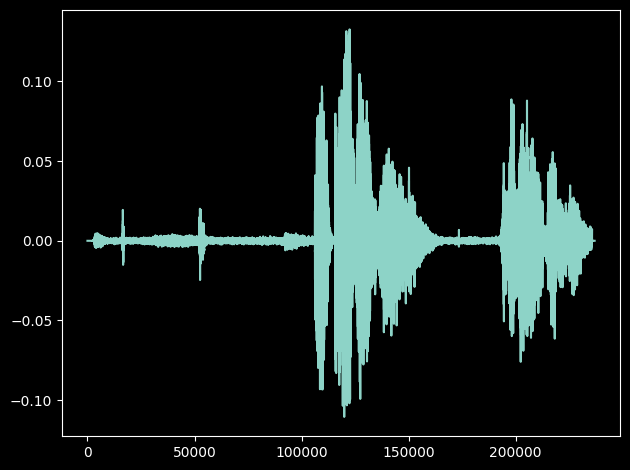

<Figure size 640x480 with 0 Axes>

In [ ]:
audio_signal, fm=soundfile.read('Seria-batman.wav')

type(audio_signal)
print('Tasa de muestreo: {} muestras/segundo'.format(fm))
print('Tamaño de la señal: {} muestras'.format(audio_signal.shape[0]))
print('Duración: {:.3f} segundos'.format(audio_signal.shape[0] / fm))

plt.plot(audio_signal)
plt.tight_layout()
plt.figure()


###5.2.3. Pasando a formato numpy

129601


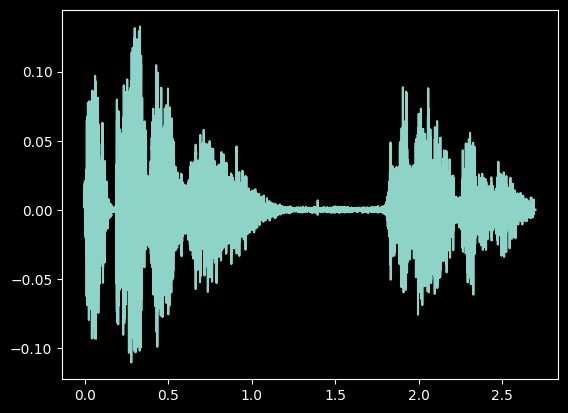

In [ ]:
t = np.arange(0,2.7,1/fm)     ## 2.7s es la duracion del audio de solo la voz

dimension_t = len(t)

print(dimension_t)
inicio=106500                 ## Inicio de la voz del gato
senial_batman=np.array(audio_signal[inicio:inicio+dimension_t])

plt.plot(t,senial_batman)
plt.show()



###5.2.4. Convolución de Kernel

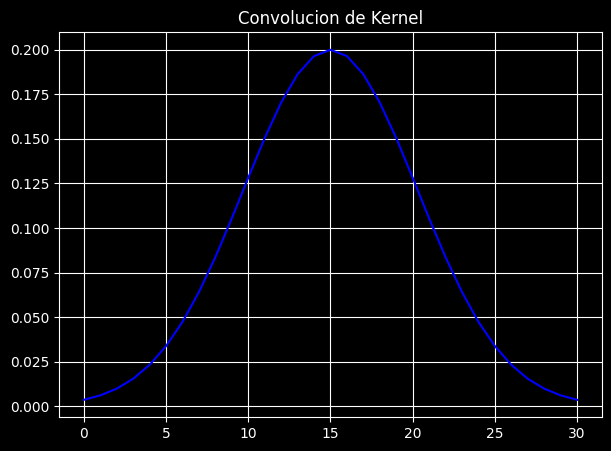

In [ ]:
h_n=0.2*np.exp(-np.linspace(-2,2,31)**2)
len_x=len(senial_batman)
len_h=len(h_n)

plt.figure(figsize=(7,5))
plt.plot(h_n,'b')
plt.title("Convolucion de Kernel")
plt.grid(True)

###5.2.5. Convolve y correlate

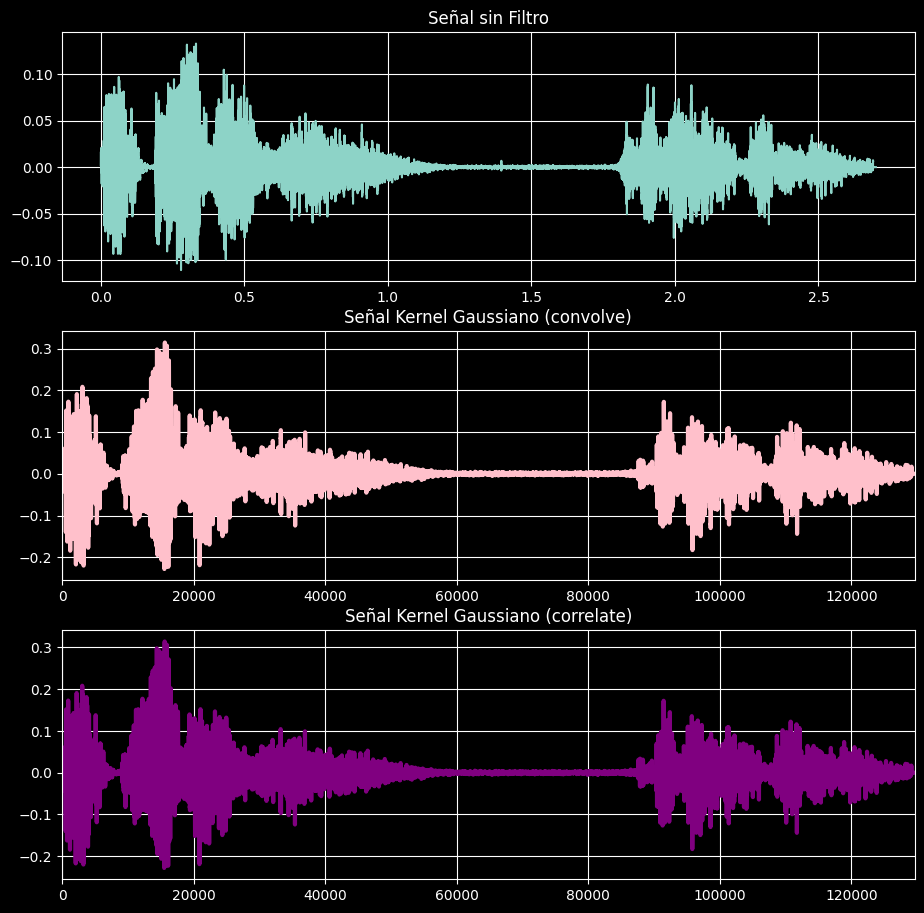

In [ ]:
y_n=np.convolve(senial_batman,h_n)
y_n_2=np.correlate(senial_batman,h_n)

plt.figure(figsize=(11,11))

plt.subplot(311)
plt.plot(t,senial_batman)
plt.title("Señal sin Filtro")
plt.grid(True)
plt.subplot(312)
plt.plot(y_n,"pink", linewidth=3)
plt.title("Señal Kernel Gaussiano (convolve)")
plt.xlim([0,len_x])
plt.grid(True)

plt.subplot(313)
plt.plot(y_n_2,"purple", linewidth=3)
plt.title("Señal Kernel Gaussiano (correlate)")
plt.xlim([0,len_x])
plt.grid(True)
plt.show()


###5.2.6. Resultados con Archivos de Audio Obtenidos

* **Guardar y exportar a formato wav, la señal con el audio con convolve y correlate

In [ ]:
rutaGuardado1='batiaudioConvolve.wav'
rutaGuardado2='batiaudioCorrelate.wav'

soundfile.write(rutaGuardado1, y_n,fm)
soundfile.write(rutaGuardado2,y_n_2,fm)

* **Reproducir y comparar señales**

In [ ]:
print("Señal Original:")
IPython.display.Audio('Seria-batman.wav')

Señal Original:


In [ ]:
print("Señal Con Kernel Gaussiano Convolve:")
IPython.display.Audio('batiaudioConvolve.wav')

Señal Con Kernel Gaussiano Convolve:


In [ ]:
print("Señal Con Kernel Gaussiano Correlate:")
IPython.display.Audio('batiaudioCorrelate.wav')

Señal Con Kernel Gaussiano Correlate:


###5.2.7. Respuesta a la Pregunta
* **¿Que efecto sonoro identifica entre el audio original y el modificado?**

Su función primordial consiste en la reducción de la intensidad de las frecuencias elevadas, lo cual tiene como resultado la atenuación del ruido y la supresión de sutilezas sonoras en el audio. Esta herramienta posibilita la eliminación del ruido ambiental y las imperfecciones sonoras presentes. Además, su acción se traduce en la suavización de los sonidos agudos de alta frecuencia. Al focalizarse en la disminución de los detalles más finos, se logra un efecto de mayor suavidad en la señal sonora, que resulta en una presentación menos minuciosa y más agradable al oído.


#**6. TEST DE COMPROBACION**

##6.a. Pregunta 1
- **a. ¿Si en el ejercicio 5a usa la función correlate en vez de convolve que diferencias en la forma y sonoras se tendría en la señal de salida?. Explique.**

    La distinción principal entre "convolve" y "correlate" en el procesamiento de audio se centra en su aplicación y el tamaño de los resultados. En el caso de "convolve", al llevar a cabo la convolución, genera una señal de salida más extensa que la señal de entrada. Por otro lado, con "correlate", al realizar la convolución, se obtiene una salida del mismo tamaño o incluso más corta que la señal de entrada.

#**7.BIBLIOGRAFÍA**

- Vicuña Muñoz, C. (1986). Aplicaciones de la teoría del muestreo. Proyecciones.
Journal of Mathematics, 5(12), 119–122.
https://doi.org/10.22199/s07160917.1986.0012.00013

- Introducción a las series de tiempo. Métodos paramétricos. Universidad De
Medellin. 1 de enero de 2007. Consultado el 6 de febrero de 2017.
https://books.google.es/books?id=KvLhxFPwvsUC&pg=PA13&dq=un+proceso+estoc%C3%A1stico+es&hl=es&sa=X&redir_esc=y#v=onepage&q=un%20proceso%20estoc%C3%A1stico%20es&f=false

- Iosif Ilyich Gikhman; Anatoly Vladimirovich Skorokhod (1969). Introducción a la
teoría de los procesos aleatorios. Courier Corporation

- Oppenheim, A. V., Willsky, A. S., & Young, I. T. (1983). Signals and systems. Englewood Cliffs, N.J: Prentice-Hall.

- Kamen, Edward W., y Bonnie S. Heck. (2008). Fundamentos de señales y sistemas usando la Web y MATLAB® PEARSON EDUCACIÓN, México, ISBN: 978-970-26-1187-5
